In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('https://raw.githubusercontent.com/diazoniclabs/Machine-Learning-using-sklearn/master/Datasets/spam.tsv',sep = '\t')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.3+ KB


In [5]:
df.size

22288

In [6]:
df.shape

(5572, 4)

In [7]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<AxesSubplot: >

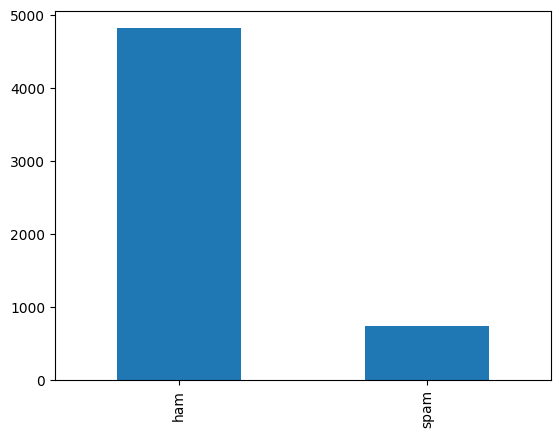

In [8]:
df.label.value_counts().plot(kind='bar')

In [9]:
x,y=df.iloc[:,1].values,df.iloc[:,0].values
print(x,"\n\n",y)

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name'] 

 ['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [10]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts (x,y,random_state = 0)
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer()
x_train_v, x_test_v = vect.fit_transform(x_train), vect.transform(x_test)
from sklearn.svm import SVC
model = SVC()
model.fit(x_train_v,y_train)
y_pred=model.predict(x_test_v)
print(y_pred,"\n\n",y_test)

['ham' 'spam' 'ham' ... 'ham' 'ham' 'ham'] 

 ['ham' 'spam' 'ham' ... 'spam' 'ham' 'ham']


In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)*100

98.56424982053123

In [12]:
from sklearn.pipeline import make_pipeline as mp
text_model = mp(TfidfVectorizer(), SVC())
text_model.fit(x_train, y_train)
y_pred_mp=text_model.predict(x_test)
print(y_pred_mp, "\n\n", y_test)

['ham' 'spam' 'ham' ... 'ham' 'ham' 'ham'] 

 ['ham' 'spam' 'ham' ... 'spam' 'ham' 'ham']


In [13]:
accuracy_score(y_pred_mp, y_test)*100

98.56424982053123

In [17]:
import joblib
joblib.dump(text_model, 'spam-ham')

['spam-ham']

In [15]:
%%writefile app.py
import streamlit as st
import joblib
model = joblib.load('spam-ham')
st.title('SPAM-HAM CLASSIFIER')
ip = st.text_input('Enter the message')
op = model.predict([ip])
if st.button('PREDICT'):
    st.title(op[0])

Overwriting app.py


In [16]:
!streamlit run app.py & npx localtunnel --port 8501

^C
